In [348]:
# importing libraries
import csv
import numpy as np
import pandas as pd

In [349]:
colnames = ['User', 'church_avg', 'resort_avg', 'beach_avg', 'park_avg', 'theater_avg',
       'museum_avg', 'mall_avg', 'zoo_avg', 'restaurants_avg', 'bars_avg',
       'local_services_avg', 'burger_pizza_avg', 'hotel_avg', 'juice_avg',
       'art_avg', 'dance_avg', 'pool_avg', 'gym_avg', 'bakery_avg',
       'beauty_avg', 'spa_avg', 'cafe_avg', 'viewpoint_avg', 'monument_avg',
       'garden_avg']

In [350]:
data = pd.read_csv('google_review_ratings.csv')
data.columns = colnames
data = data.drop("User", axis=1)
data = data.fillna(0.0)

In [351]:
x = pd.array(np.zeros(len(data["local_services_avg"])))
problem_idx = 0


for i in range(0, len(data["local_services_avg"])-1):
    try:
        x[i] = float(data["local_services_avg"][i])
    except:
        print(i)
        x[i] = float(0.0)

data["local_services_avg"] = x

2712


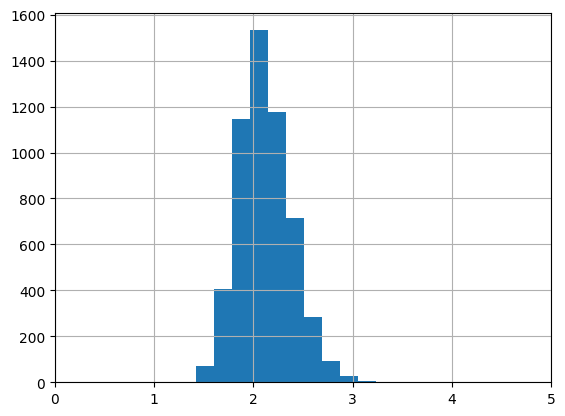

In [352]:
import matplotlib.pyplot as plt
data["user_average"] = data.apply(lambda row: row[row.apply(lambda x: isinstance(x, (int, float))) & (row != 0)].mean(), axis=1)
data["user_average"].hist()
plt.xlim(0, 5)
plt.show()


In [353]:
data["skew"] = data["user_average"] - 2.5

In [354]:
unskew = data
x = unskew["skew"]
unskew = unskew.drop("skew", axis=1)
unskew["skew"] = x # get rid of initial mean function


In [355]:
unskew = unskew.apply(lambda row: row[row.apply # subtracts skew from non-zero values
                             (lambda y: isinstance(y, (int, float)))
                             & (row != 0)] 
                             - x, 
                             axis=0)
unskew = unskew.fillna(0)

In [356]:
unskew = unskew.drop(labels=["user_average"], axis=1)
unskew["user_average"] = unskew.apply(lambda row: row[row.apply(
    lambda x: isinstance(x, (int, float))) 
    & (row != 0)].mean(), # creates new user average
    axis=1)

In [358]:
raw = data.apply(lambda col: col[col.apply(lambda x: isinstance(x, (int, float))) & (col != 0)].mean(), axis= 0).to_dict()
normalized = unskew.apply(lambda col: col[col.apply(lambda x: isinstance(x, (int, float))) & (col != 0)].mean(), axis= 0).to_dict()
# fix normalized skew
normalized["skew"] = 0.0

print(raw)
print(normalized)

{'church_avg': 1.5096768675156813, 'resort_avg': 2.358613492359299, 'beach_avg': 2.4911573734409393, 'park_avg': 2.7968859970674487, 'theater_avg': 2.958940615835777, 'museum_avg': 2.8934897360703813, 'mall_avg': 3.3513947947214073, 'zoo_avg': 2.5407954545454543, 'restaurants_avg': 3.1260190615835772, 'bars_avg': 2.8327291055718473, 'local_services_avg': 2.550364869820315, 'burger_pizza_avg': 2.078339138405133, 'hotel_avg': 2.1255113636363636, 'juice_avg': 2.1908614369501467, 'art_avg': 2.208191489361702, 'dance_avg': 1.2177994011976048, 'pool_avg': 1.0405565601768134, 'gym_avg': 1.0108335210633026, 'bakery_avg': 1.1998390022675738, 'beauty_avg': 1.196576754385965, 'spa_avg': 1.0860696619950536, 'cafe_avg': 1.8687008413226376, 'viewpoint_avg': 1.6211893674815678, 'monument_avg': 1.627900573613767, 'garden_avg': 1.81, 'user_average': 2.120645714017358, 'skew': -0.3793542859826422}
{'church_avg': 1.8980891714816805, 'resort_avg': 2.7436446901673333, 'beach_avg': 2.8707486592449833, 'park

In [359]:
means = pd.DataFrame([raw, normalized]).transpose()
means.columns = ["raw", "normalized"]
means = means.drop(["skew", "user_average"], axis=0)
means["difference"] = means["normalized"] - means["raw"]
#means[:"church_avg"]


In [360]:
for n in data["garden_avg"]:
    if n > 0.0:
        print(n)

# removing "garden_avg" because of low n count
        
means = means.drop("garden_avg", axis=0)

1.04
2.58


In [361]:
means["difference"].mean()

0.3873730897663091

<Axes: >

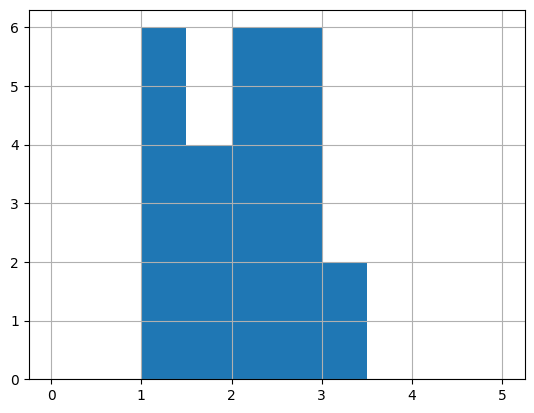

In [362]:
means["raw"].hist(range=(0,5))

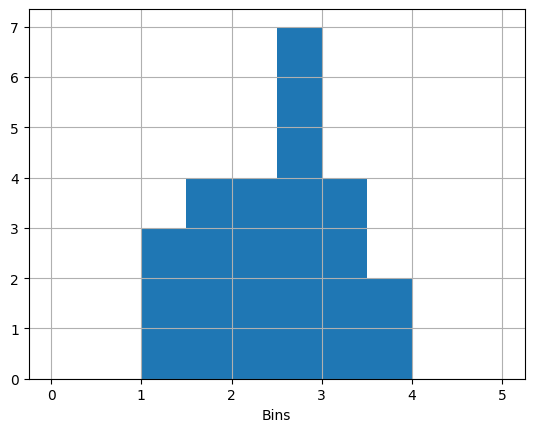

In [363]:
means["normalized"].hist(range=(0,5))
#plt.xlim(0, 5)
plt.xlabel('Bins')
plt.show()


<Axes: >

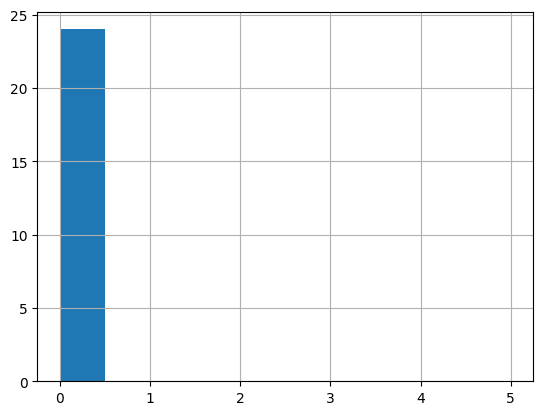

In [364]:
means["difference"].hist(range=(0,5))

In [371]:
from scipy import stats

# Input sample mean
sample_mean = float(input("what's your mean?"))

# Perform t-test
t_statistic, p_value = stats.ttest_1samp([], sample_mean)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)


,raw,normalized,difference
church_avg,1.509677,1.898089,0.388412
resort_avg,2.358613,2.743645,0.385031
beach_avg,2.491157,2.870749,0.379591
park_avg,2.796886,3.176240,0.379354
theater_avg,2.958941,3.338295,0.379354
museum_avg,2.893490,3.272844,0.379354
mall_avg,3.351395,3.730749,0.379354
zoo_avg,2.540795,2.920150,0.379354
restaurants_avg,3.126019,3.505373,0.379354
bars_avg,2.832729,3.212083,0.379354
